In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

src_dir = pathlib.Path.cwd().parent / "src"  # adjust if needed
tracker_path = src_dir / "US_TeaPlant" / "data" / "r2" / "us_fed_front2_tracker.parquet"

df = pd.read_parquet(tracker_path)
df = df.sort_values(["meeting_date", "target_rate_band", "as_of_date"])


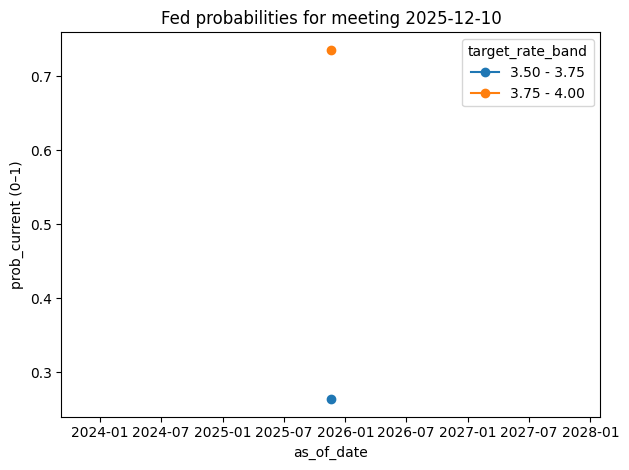

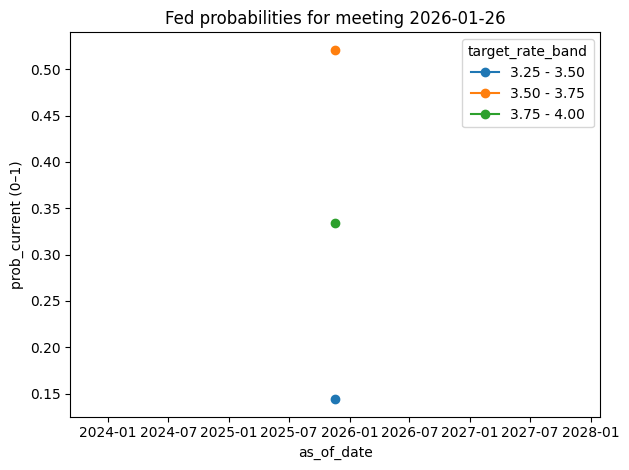

In [2]:
for meeting in sorted(df["meeting_date"].unique()):
    df_m = df[df["meeting_date"] == meeting]
    pivot = df_m.pivot(
        index="as_of_date",
        columns="target_rate_band",
        values="prob_current",
    ).sort_index()

    if pivot.empty:
        continue

    ax = pivot.plot(marker="o")
    ax.set_title(f"Fed probabilities for meeting {meeting}")
    ax.set_ylabel("prob_current (0–1)")
    ax.set_xlabel("as_of_date")
    plt.tight_layout()
    plt.show()